<a href="https://colab.research.google.com/github/Narendra69/Predctive-analytic/blob/Customer-pred-buy/Customer_pred_buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go
#import plotly.figure_factory as ff
#AUC, confusion matrix

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv("/content/Data.csv")

In [3]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
944463,575312,22083,PAPER CHAIN KIT RETROSPOT,6,2011-11-09 12:49:00,2.95,13588.0,United Kingdom
944464,575312,23355,HOT WATER BOTTLE KEEP CALM,4,2011-11-09 12:49:00,4.95,13588.0,United Kingdom
944465,575312,22110,BIRD HOUSE HOT WATER BOTTLE,6,2011-11-09 12:49:00,2.55,13588.0,United Kingdom
944466,575312,22037,ROBOT BIRTHDAY CARD,12,2011-11-09 12:49:00,0.42,13588.0,United Kingdom


In [4]:
data.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944468 entries, 0 to 944467
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    944468 non-null  object 
 1   StockCode    944468 non-null  object 
 2   Description  940274 non-null  object 
 3   Quantity     944468 non-null  int64  
 4   InvoiceDate  944468 non-null  object 
 5   UnitPrice    944468 non-null  float64
 6   CustomerID   732567 non-null  float64
 7   Country      944468 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 57.6+ MB


In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,4194
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,211901
Country,0


In [7]:
np.round(data.isnull().sum()["CustomerID"]/data.InvoiceNo.shape[0] * 100, 2)

np.float64(22.44)

In [8]:
df_data = data.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732567 entries, 0 to 944467
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    732567 non-null  object 
 1   StockCode    732567 non-null  object 
 2   Description  732567 non-null  object 
 3   Quantity     732567 non-null  int64  
 4   InvoiceDate  732567 non-null  object 
 5   UnitPrice    732567 non-null  float64
 6   CustomerID   732567 non-null  float64
 7   Country      732567 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 50.3+ MB


In [9]:
df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,944468.000000,944468.000000,732567.000000
mean,10.220727,4.649261,15313.607487
std,139.363557,125.813579,1694.646055
min,-74215.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.100000,15242.000000
75%,11.000000,4.150000,16784.000000
max,74215.000000,38970.000000,18287.000000


In [11]:
print('From the dataset, the online retail shop has {} customers \
from {} different countries.'.format(len(df_data.CustomerID.unique()), len(df_data.Country.unique())))

From the dataset, the online retail shop has 5780 customers from 41 different countries.


In [12]:
ctm_cntry_df = df_data.groupby(['CustomerID', 'Country']).count().reset_index()

ctm_cntry_df = ctm_cntry_df.groupby('Country')['CustomerID'].count().reset_index().sort_values(
    by=['CustomerID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
ctm_cntry_df['Percentage']= np.round(ctm_cntry_df.CustomerID / ctm_cntry_df.CustomerID.sum() * 100, 2)

ctm_cntry_df.head(10)

,Country,CustomerID,Percentage
38,United Kingdom,5268,90.94
14,Germany,102,1.76
13,France,89,1.54
32,Spain,40,0.69
3,Belgium,29,0.50
24,Netherlands,23,0.40
28,Portugal,22,0.38
34,Switzerland,21,0.36
33,Sweden,19,0.33
18,Italy,16,0.28


In [13]:
# Initialise a dict object. This is supposed to collect all customers who indicated more than 1 country
ctm_2_cntry = {}

# for each index and customer id
for idx, cid in enumerate(df_data.CustomerID.unique()):

    # Get the country that the customer resides
    cntry = df_data[df_data.CustomerID == cid].Country.unique()

    # if customer has lived in more than 1 country
    if len(cntry) > 1:

        # Update the ctm_2_cntry
        ctm_2_cntry[cid] = cntry

pd.DataFrame(ctm_2_cntry) # Create a pandas dataframe using ctm_2_cntry


,12417.0,12455.0,12422.0,12431.0,12745.0,12370.0,12429.0,12423.0,12449.0,12457.0,12652.0,12413.0,12394.0
0,Belgium,Cyprus,Australia,Belgium,EIRE,Austria,Denmark,Denmark,Denmark,Switzerland,Germany,Spain,Belgium
1,Spain,Spain,Switzerland,Australia,United Kingdom,Cyprus,Austria,Belgium,Belgium,Cyprus,France,France,Denmark


In [14]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
ctm_cntry_df['CountryCategory'] = ctm_cntry_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

ctm_cntry_df.loc[ctm_cntry_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

ctm_cntry_df.head(11)

,Country,CustomerID,Percentage,CountryCategory
38,United Kingdom,5268,90.94,United Kingdom
14,Germany,102,1.76,Germany
13,France,89,1.54,France
32,Spain,40,0.69,Spain
3,Belgium,29,0.50,Belgium
24,Netherlands,23,0.40,Netherlands
28,Portugal,22,0.38,Portugal
34,Switzerland,21,0.36,Switzerland
33,Sweden,19,0.33,Sweden
18,Italy,16,0.28,Italy


In [16]:
# plot pie chart

pie_fig = px.pie(ctm_cntry_df,
                 names="CountryCategory",
                 values="Percentage",
                 title="Customer Country Count in Percentage"
                )

pie_fig.update_layout(title_x=0,
                      legend_title="Countries Represented",
                      legend=dict(orientation="h")
                     )

pie_fig.show(config={'displaylogo': False})


In [17]:
df_data['InvoiceYearMonth'] = df_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912


In [18]:
df_data['Revenue'] = df_data.UnitPrice * df_data.Quantity
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [19]:
ctm_revenue = df_data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue.head()

,InvoiceYearMonth,Revenue
0,200912,660125.100
1,201001,530436.512
2,201002,487596.426
3,201003,633419.311
4,201004,558007.832


In [20]:
pd.DataFrame(ctm_revenue.Revenue.describe())

,Revenue
count,2.400000e+01
mean,6.307889e+05
std,1.928468e+05
min,3.173142e+05
25%,5.468888e+05
50%,5.758443e+05
75%,6.502900e+05
max,1.129025e+06


In [21]:
# plot line plot
line_fig = px.line(ctm_revenue,
                   x = "InvoiceYearMonth",
                   y = "Revenue",
                   title = "Montly Revenue from Dec. 2009 to Dec. 2011"
                  )

line_fig.update_layout(title_x=0.5,
                       showlegend=False,
                       xaxis={"type": "category"},
                       xaxis_title="Invoice Year-Month",
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})

In [22]:
cntry_revenue_df = df_data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'],
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
38,United Kingdom,1.251781e+07,82.69
10,EIRE,5.404355e+05,3.57
24,Netherlands,5.152336e+05,3.40
14,Germany,3.805780e+05,2.51
13,France,2.892641e+05,1.91


In [23]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cntry_revenue_df.head(11)

,Country,Revenue,Percentage,CountryCategory
38,United Kingdom,1.251781e+07,82.69,United Kingdom
10,EIRE,5.404355e+05,3.57,EIRE
24,Netherlands,5.152336e+05,3.40,Netherlands
14,Germany,3.805780e+05,2.51,Germany
13,France,2.892641e+05,1.91,France
0,Australia,1.608026e+05,1.06,Australia
34,Switzerland,9.687012e+04,0.64,Switzerland
33,Sweden,8.545965e+04,0.56,Sweden
32,Spain,8.390503e+04,0.55,Spain
9,Denmark,6.159112e+04,0.41,Denmark


In [24]:
# plot pie chart
pie_fig = px.pie(cntry_revenue_df,
                 names="CountryCategory",
                 values="Percentage",
                 title="Country Revenue in Percentage"
                )

pie_fig.update_layout(title_x=0,
                      legend_title="Countries Represented",
                      legend=dict(orientation="h")
                     )

pie_fig.show(config={'displaylogo': False})

In [25]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [26]:
ctm_bhvr_dt = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) &
      (df_data.InvoiceDate >= pd.Timestamp(2009,12,1))].reset_index(drop=True)


ctm_next_quarter = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,12,1)) &
      (df_data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [27]:
# Get the distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['CustomerID']

ctm_dt.head()

,CustomerID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0


In [28]:
# Create a dataframe with CustomerID and customers first purchase
# date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12347.0,2011-10-31 12:25:00
1,12348.0,2011-09-25 13:13:00
2,12352.0,2011-09-20 14:34:00
3,12357.0,2011-11-06 16:07:00
4,12359.0,2011-10-13 12:47:00


In [29]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [30]:
# Merge two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID',
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346.0,2011-01-18 10:17:00,NaT
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12349.0,2010-10-28 08:23:00,NaT
4,12350.0,2011-02-02 16:01:00,NaT


In [31]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346.0,2011-01-18 10:17:00,NaT,NaN
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12349.0,2010-10-28 08:23:00,NaT,NaN
4,12350.0,2011-02-02 16:01:00,NaT,NaN


In [32]:
# merge with ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,NaN
1,13078.0,13.0
2,15362.0,NaN
3,18102.0,27.0
4,12682.0,15.0


In [33]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,9999.0
1,13078.0,13.0
2,15362.0,9999.0
3,18102.0,27.0
4,12682.0,15.0


In [34]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [35]:
# Find the recency in days
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,13085.0,9999.0,57
1,13078.0,13.0,0
2,15362.0,9999.0,348
3,18102.0,27.0,26
4,12682.0,15.0,0


In [36]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,5314.000000
mean,204.675574
std,173.569622
min,0.000000
25%,48.000000
50%,161.000000
75%,320.000000
max,638.000000


In [37]:
# plot histogram
hist_fig = px.histogram(ctm_dt,
                        x="Recency",
                        title="Customers Recency in Days"                       )

hist_fig.update_layout(title_x=0.5,
                       xaxis_title="Recency in groups of 20 days",
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [38]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})

In [39]:
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,0
1,13078.0,13.0,0,0
2,15362.0,9999.0,348,1
3,18102.0,27.0,26,0
4,12682.0,15.0,0,0


In [40]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean

    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns

    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name

    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)

    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index

    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)

    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)

    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final

In [41]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,3
1,13078.0,13.0,0,3
2,15362.0,9999.0,348,1
3,18102.0,27.0,26,3
4,12682.0,15.0,0,3


In [42]:
#print cluster characteristics
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,746.0,521.058981,64.958173,419.0,467.25,517.0,572.0,638.0
1,1418.0,315.367419,40.937579,238.0,282.00,309.0,339.0,418.0
2,1072.0,158.852612,38.999470,100.0,125.00,156.0,189.0,237.0
3,2078.0,39.198749,28.732667,0.0,13.00,34.0,63.0,99.0


In [43]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df_data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [44]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,13085.0,9999.0,57,3,92
1,13078.0,13.0,0,3,801
2,15362.0,9999.0,348,1,40
3,18102.0,27.0,26,3,1026
4,12682.0,15.0,0,3,901


In [45]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,5314.000000
mean,134.508656
std,329.625858
min,1.000000
25%,21.000000
50%,54.000000
75%,140.750000
max,11217.000000


In [46]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [47]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,9999.0,57,3,92,3
1,13078.0,13.0,0,3,801,2
2,15362.0,9999.0,348,1,40,3
3,18102.0,27.0,26,3,1026,2
4,12682.0,15.0,0,3,901,2


In [48]:
#see details of each cluster
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2.0,10768.500000,634.274783,10320.0,10544.25,10768.5,10992.75,11217.0
1,15.0,3273.266667,1169.850935,1951.0,2568.00,2700.0,3850.50,6167.0
2,472.0,599.322034,279.712603,337.0,395.00,491.0,720.75,1782.0
3,4825.0,74.873161,75.893473,1.0,19.00,47.0,106.00,336.0


from matplotlib import pyplot as plt
_df_0['FrequencyCluster'].plot(kind='hist', bins=20, title='FrequencyCluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='FrequencyCluster', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FrequencyCluster']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('FrequencyCluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FrequencyCluster')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FrequencyCluster']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('FrequencyCluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FrequencyCluster')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FrequencyCluster']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('FrequencyCluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FrequencyCluster')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FrequencyCluster']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('FrequencyCluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FrequencyCluster')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['FrequencyCluster'].plot(kind='line', figsize=(8, 4), title='FrequencyCluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

In [49]:
ctm_revenue = df_data.groupby('CustomerID').Revenue.sum().reset_index()

In [50]:
#merge it with our ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13085.0,9999.0,57,3,92,3,1459.46
1,13078.0,13.0,0,3,801,2,25982.25
2,15362.0,9999.0,348,1,40,3,613.08
3,18102.0,27.0,26,3,1026,2,558608.99
4,12682.0,15.0,0,3,901,2,20633.90


In [51]:
#apply clustering
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])

In [52]:
#order the cluster numbers
ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13085.0,9999.0,57,3,92,3,1459.46,0
1,13078.0,13.0,0,3,801,2,25982.25,0
2,15362.0,9999.0,348,1,40,3,613.08,0
3,18102.0,27.0,26,3,1026,2,558608.99,3
4,12682.0,15.0,0,3,901,2,20633.90,0


In [53]:
#show details of the dataframe
ctm_dt.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,5277.0,2040.490996,3543.694998,-25111.09,323.250,854.99,2175.5200,33851.13
1,30.0,66614.804767,29289.029540,35491.87,44843.768,54196.19,87472.4975,137913.89
2,5.0,215844.318000,51457.649123,157180.48,182233.460,211060.52,239002.6900,289744.44
3,2.0,524667.270000,48000.840754,490725.55,507696.410,524667.27,541638.1300,558608.99


In [56]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
2,451.000000,362.000000,2726.520000
3,515.185621,36.253595,426.337166
4,308.259767,93.122001,1173.541888
5,123.292231,243.887384,3949.540522
6,41.948657,119.727164,3246.070053
7,5.800000,707.500000,131661.751000
8,26.000000,1026.000000,558608.990000


In [57]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 4, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 6, 'Segment'] = 'High-Value'

In [58]:
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13085.0,9999.0,57,3,92,3,1459.46,0,6,Mid-Value
1,13078.0,13.0,0,3,801,2,25982.25,0,5,Mid-Value
2,15362.0,9999.0,348,1,40,3,613.08,0,4,Low-Value
3,18102.0,27.0,26,3,1026,2,558608.99,3,8,High-Value
4,12682.0,15.0,0,3,901,2,20633.90,0,5,Mid-Value


In [59]:
#create ctm_class as a copy of ctm_dt before applying get_dummies
ctm_class = ctm_dt.copy()
ctm_class = pd.get_dummies(ctm_class)
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,13085.0,9999.0,57,3,92,3,1459.46,0,6,False,False,True
1,13078.0,13.0,0,3,801,2,25982.25,0,5,False,False,True
2,15362.0,9999.0,348,1,40,3,613.08,0,4,False,True,False
3,18102.0,27.0,26,3,1026,2,558608.99,3,8,True,False,False
4,12682.0,15.0,0,3,901,2,20633.90,0,5,False,False,True


In [60]:
ctm_class['NextPurchaseDayRange'] = 1  ## less than 3 months
ctm_class.loc[ctm_class.NextPurchaseDay>90,'NextPurchaseDayRange'] = 0 # more than 3 months
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,13085.0,9999.0,57,3,92,3,1459.46,0,6,False,False,True,0
1,13078.0,13.0,0,3,801,2,25982.25,0,5,False,False,True,1
2,15362.0,9999.0,348,1,40,3,613.08,0,4,False,True,False,0
3,18102.0,27.0,26,3,1026,2,558608.99,3,8,True,False,False,1
4,12682.0,15.0,0,3,901,2,20633.90,0,5,False,False,True,1


In [61]:
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
CustomerID,-0.046926,0.045049
NextPurchaseDay,-0.638385,0.430140
Recency,-0.965009,0.854769
RecencyCluster,-0.965009,0.962955
Frequency,-0.701382,0.484804
FrequencyCluster,-0.701382,0.301186
Revenue,-0.364836,0.872391
RevenueCluster,-0.291138,0.872391
OverallScore,-0.927383,0.962955
Segment_High-Value,-0.061614,0.620560


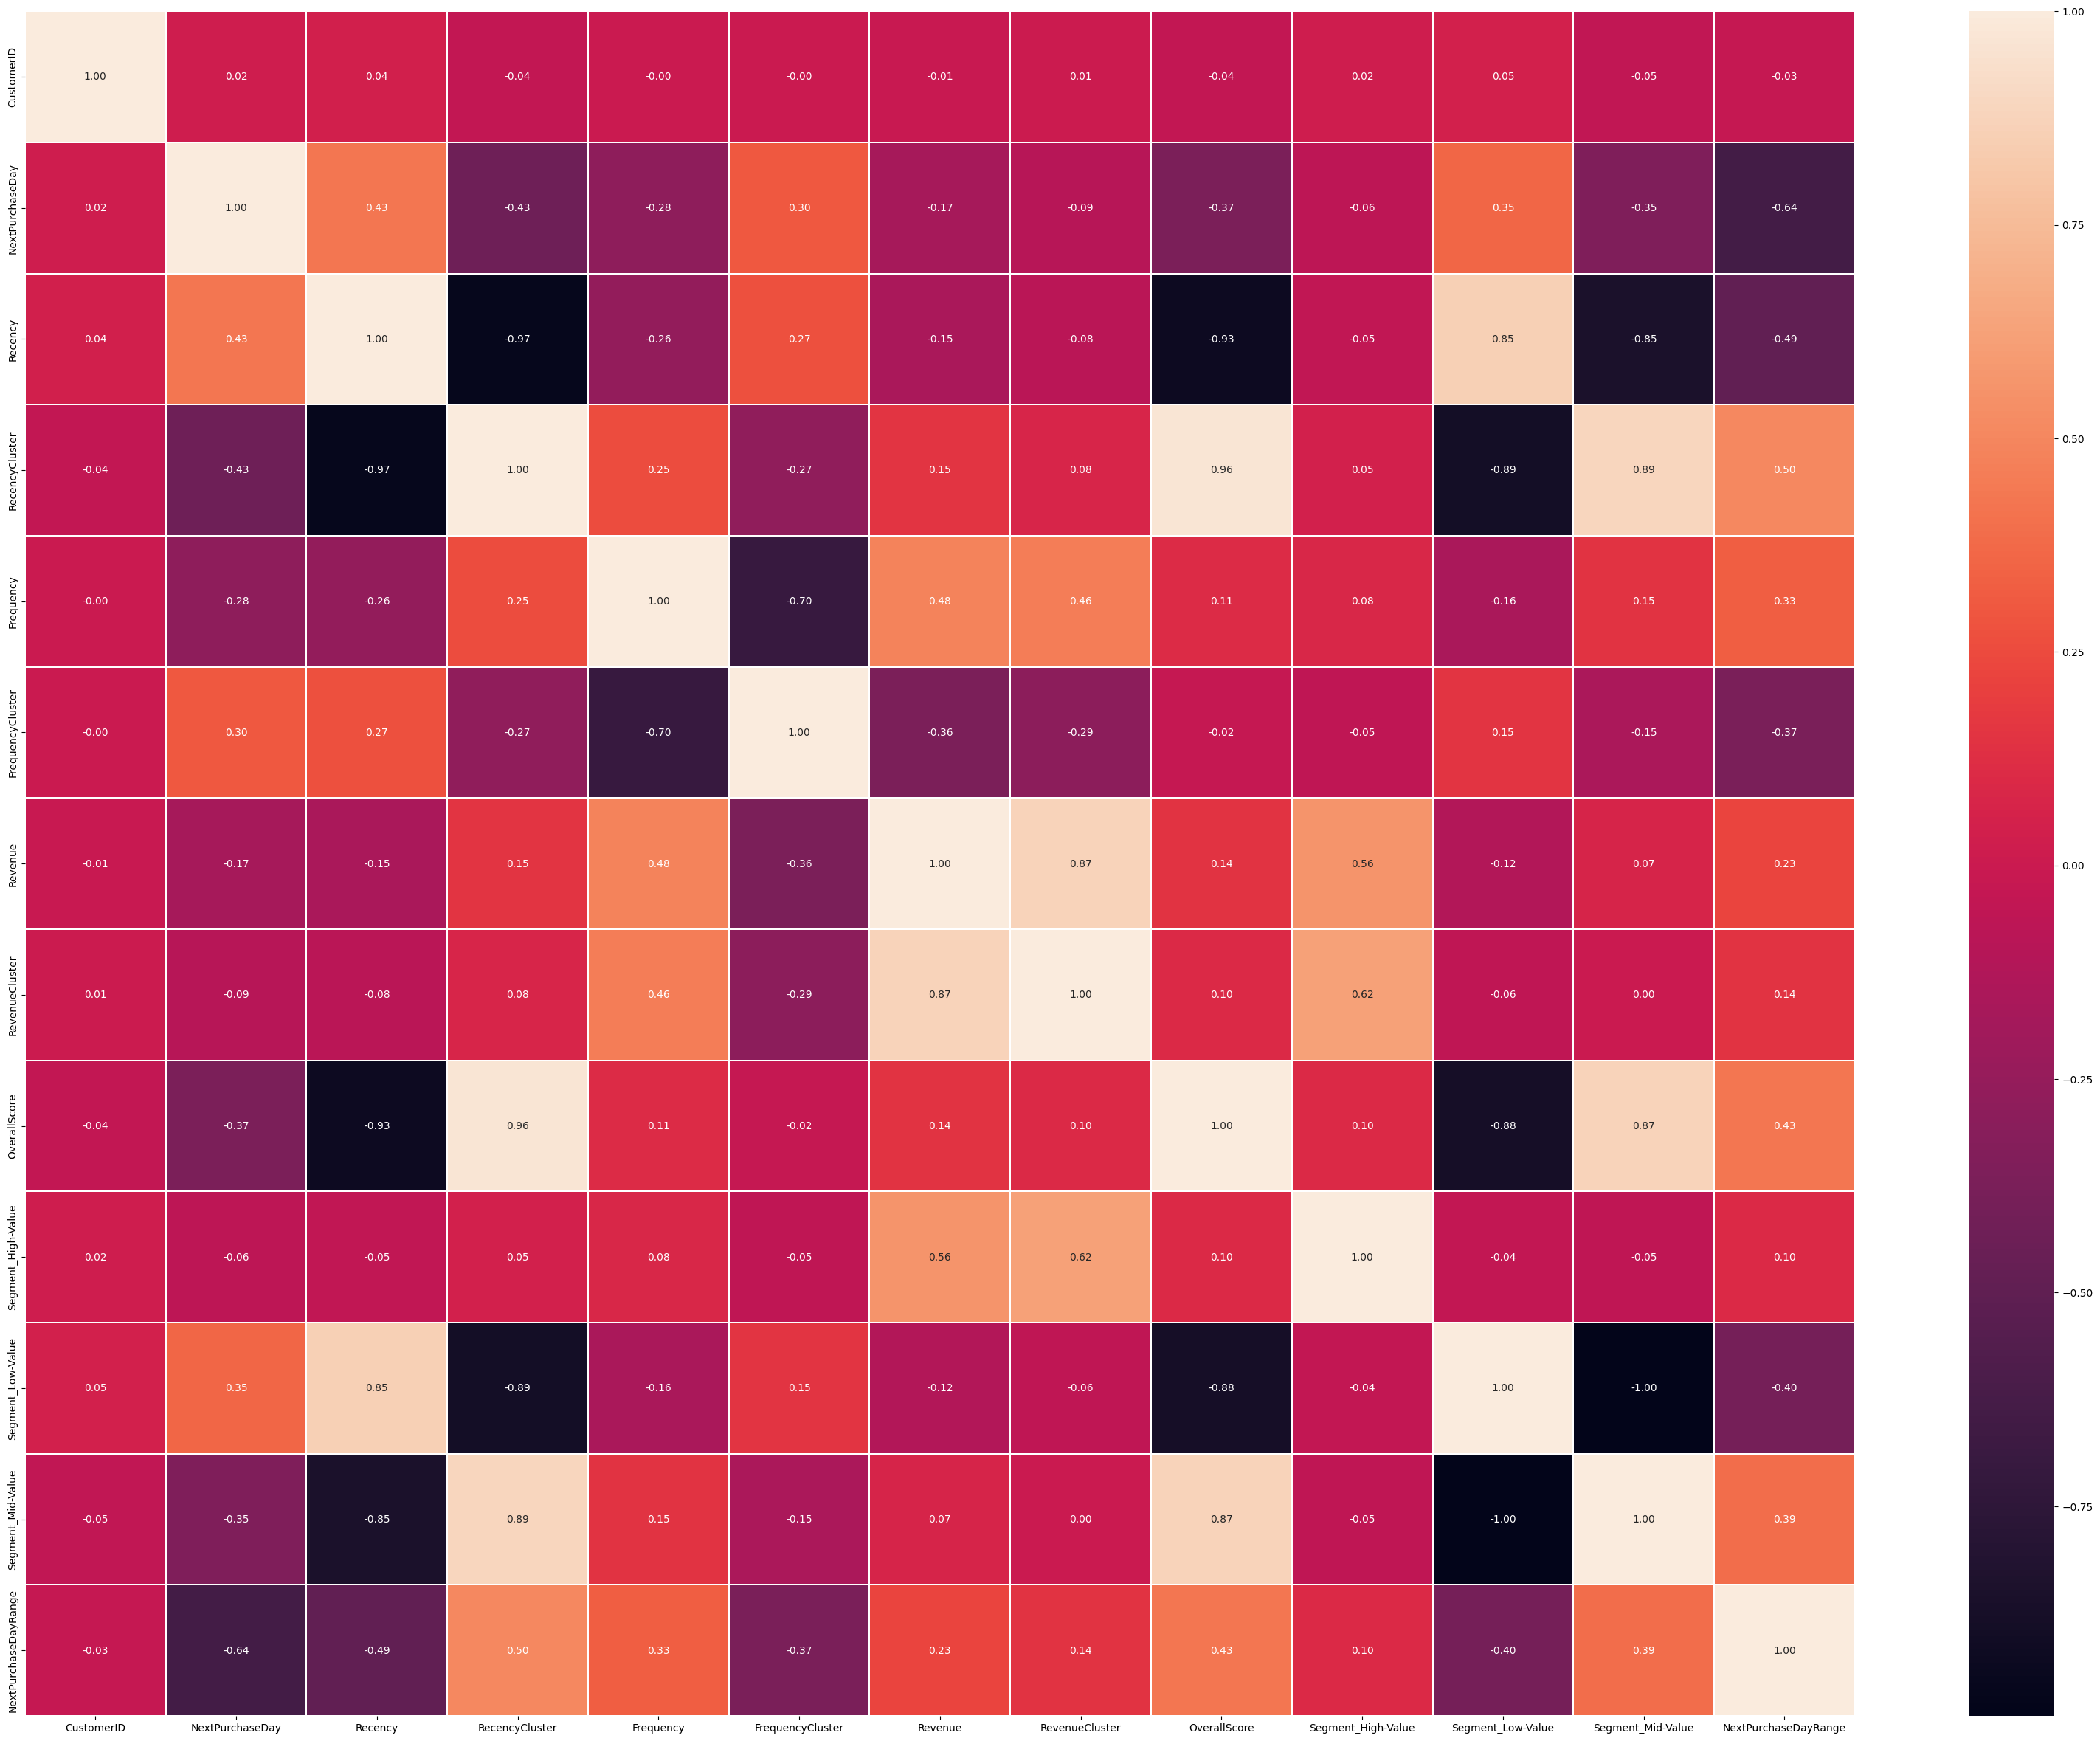

In [62]:
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

In [63]:
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)

In [64]:
ctm_class

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,13085.0,57,3,92,3,1459.46,0,6,False,False,True,0
1,13078.0,0,3,801,2,25982.25,0,5,False,False,True,1
2,15362.0,348,1,40,3,613.08,0,4,False,True,False,0
3,18102.0,26,3,1026,2,558608.99,3,8,True,False,False,1
4,12682.0,0,3,901,2,20633.90,0,5,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5309,15866.0,1,3,43,3,211.89,0,6,False,False,True,0
5310,14660.0,0,3,30,3,285.74,0,6,False,False,True,1
5311,13726.0,0,3,42,3,1079.66,0,6,False,False,True,1
5312,15690.0,0,3,8,3,111.00,0,6,False,False,True,0


In [65]:
X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [66]:
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))

In [67]:
for name,model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

LogisticRegression [0.88993415 0.89741176]
GaussianNB [0.88570085 0.88235294]
RandomForestClassifier [0.89228598 0.89035294]
SVC [0.8523048  0.83529412]
DecisionTreeClassifier [0.86970837 0.86682353]
xgb.XGBClassifier [0.87676388 0.88470588]
KNeighborsClassifier [0.84571966 0.84329412]


In [68]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
       .format(rf_model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
       .format(rf_model.score(X_test[X_train.columns], y_test)))
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       876
           1       0.72      0.72      0.72       187

    accuracy                           0.90      1063
   macro avg       0.83      0.83      0.83      1063
weighted avg       0.90      0.90      0.90      1063



In [70]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.89
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       876
           1       0.70      0.70      0.70       187

    accuracy                           0.89      1063
   macro avg       0.82      0.82      0.82      1063
weighted avg       0.89      0.89      0.89      1063



In [71]:
parameter = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'),
                             param_grid = parameter,
                             scoring='accuracy',
                             n_jobs=-1,
                             #iid=False,
                             cv=2
                            )

p_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [72]:
p_grid_search.best_params_, p_grid_search.best_score_

({'max_depth': 3, 'min_child_weight': 3}, np.float64(0.8870857174478446))

In [73]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss',
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1,
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.92
Accuracy of XGB classifier on test set: 0.90


In [74]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)

In [77]:
#Merge predictions to original data
ref_xgb_pred_y = refined_xgb_model.predict(X)

ctm_class['predictions'] = ref_xgb_pred_y

ctm_class_final = ctm_class[['CustomerID', 'predictions']]
ctm_class_final

,CustomerID,predictions
0,13085.0,0
1,13078.0,1
2,15362.0,0
3,18102.0,1
4,12682.0,1
...,...,...
5309,15866.0,0
5310,14660.0,1
5311,13726.0,1
5312,15690.0,0


In [79]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.

    INPUT:
        y_test - A numpy array
        y_pred - A numpy array

    OUTPUT:
        NoneType
    """

    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                              rownames=['Actual'],
                              colnames=['Predicted'])

    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()


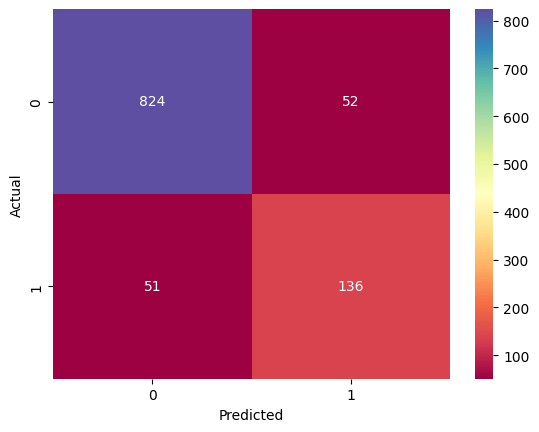

In [81]:
ref_xgb_pred_y_test = refined_xgb_model.predict(X_test)
get_confusion_matrix(np.array(y_test), ref_xgb_pred_y_test)

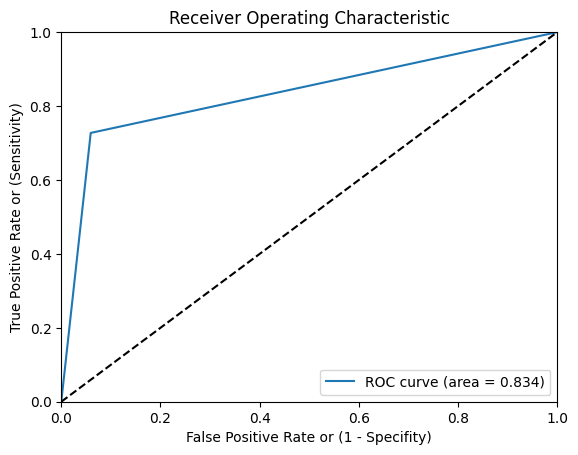

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, ref_xgb_pred_y_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")